# SVM Algorithm - Forest fire Problem

## -------------------------------------------------------------------------------------------------------------------------

## Problem Statement : Classify the Size_Categorie using SVM.

## 1. Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [2]:
forest_fire_data = pd.read_csv('forestfires.csv',sep=',')
forest_fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## 3. Data Understanding :

### 3.1 About the data :

* **month** - month of the year: 'jan' to 'dec'
* **day**- day of the week: 'mon' to 'sun'
* **FFMC**-FFMC index from the FWI system: 18.7 to 96.20
* **DMC**-DMC index from the FWI system: 1.1 to 291.3
* **DC**-DC index from the FWI system: 7.9 to 860.6
* **ISI**-ISI index from the FWI system: 0.0 to 56.10
* **temp**-temperature in Celsius degrees: 2.2 to 33.30
* **RH**-relative humidity in %: 15.0 to 100
* **wind**-wind speed in km/h: 0.40 to 9.40
* **rain**-outside rain in mm/m2 : 0.0 to 6.4
* **Size_Categorie**-the burned area of the forest ( Small , Large)

### 3.2 Initial Analysis :

In [3]:
forest_fire_data.shape

(517, 31)

In [4]:
forest_fire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest_fire_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

## 4. Data Preparation :

In [6]:
forest_fire_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
#Renaming columns :

forest_fire_data.columns = ['month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
                           'rain', 'area', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
                           'day_tue', 'day_wed', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
                           'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                           'month_oct', 'month_sep', 'size_category']
forest_fire_data.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## 5. Data Pre-Processing :

In [8]:
forest_fire_data_copy = forest_fire_data.copy()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
forest_fire_data_copy['month'] = le.fit_transform(forest_fire_data['month'])
forest_fire_data_copy['day'] = le.fit_transform(forest_fire_data['day'])
forest_fire_data_copy['size_category'] = le.fit_transform(forest_fire_data['size_category'])

In [10]:
forest_fire_data_copy.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


### 5.2 Datatypes after transformation :

In [11]:
forest_fire_data_copy.dtypes

month              int32
day                int32
ffmc             float64
dmc              float64
dc               float64
isi              float64
temp             float64
rh                 int64
wind             float64
rain             float64
area             float64
day_fri            int64
day_mon            int64
day_sat            int64
day_sun            int64
day_thu            int64
day_tue            int64
day_wed            int64
month_apr          int64
month_aug          int64
month_dec          int64
month_feb          int64
month_jan          int64
month_jul          int64
month_jun          int64
month_mar          int64
month_may          int64
month_nov          int64
month_oct          int64
month_sep          int64
size_category      int32
dtype: object

In [12]:
forest_fire_data_copy.drop(labels=['day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
                           'day_tue', 'day_wed', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
                           'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                           'month_oct', 'month_sep'],axis=1,inplace = True)

In [13]:
forest_fire_data_copy.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


## 6. Model Building :

In [14]:
X = forest_fire_data_copy.drop(labels= 'size_category',axis=1)
y = forest_fire_data_copy[['size_category']]

### Visualisation :

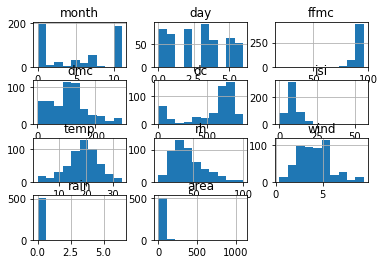

In [45]:
X.hist()
plt.show()

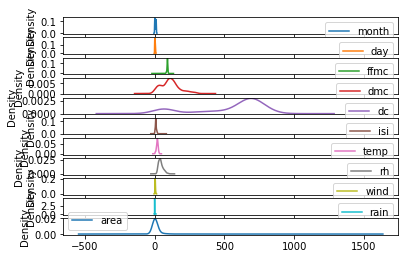

In [61]:
X.plot(kind='density', subplots=True, layout=(11,1))
plt.show()

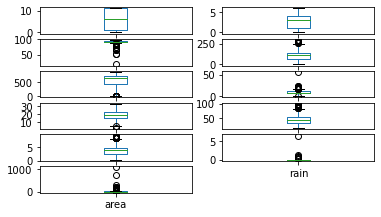

In [63]:
X.plot(kind='box', subplots=True, layout=(7,2))
plt.show()

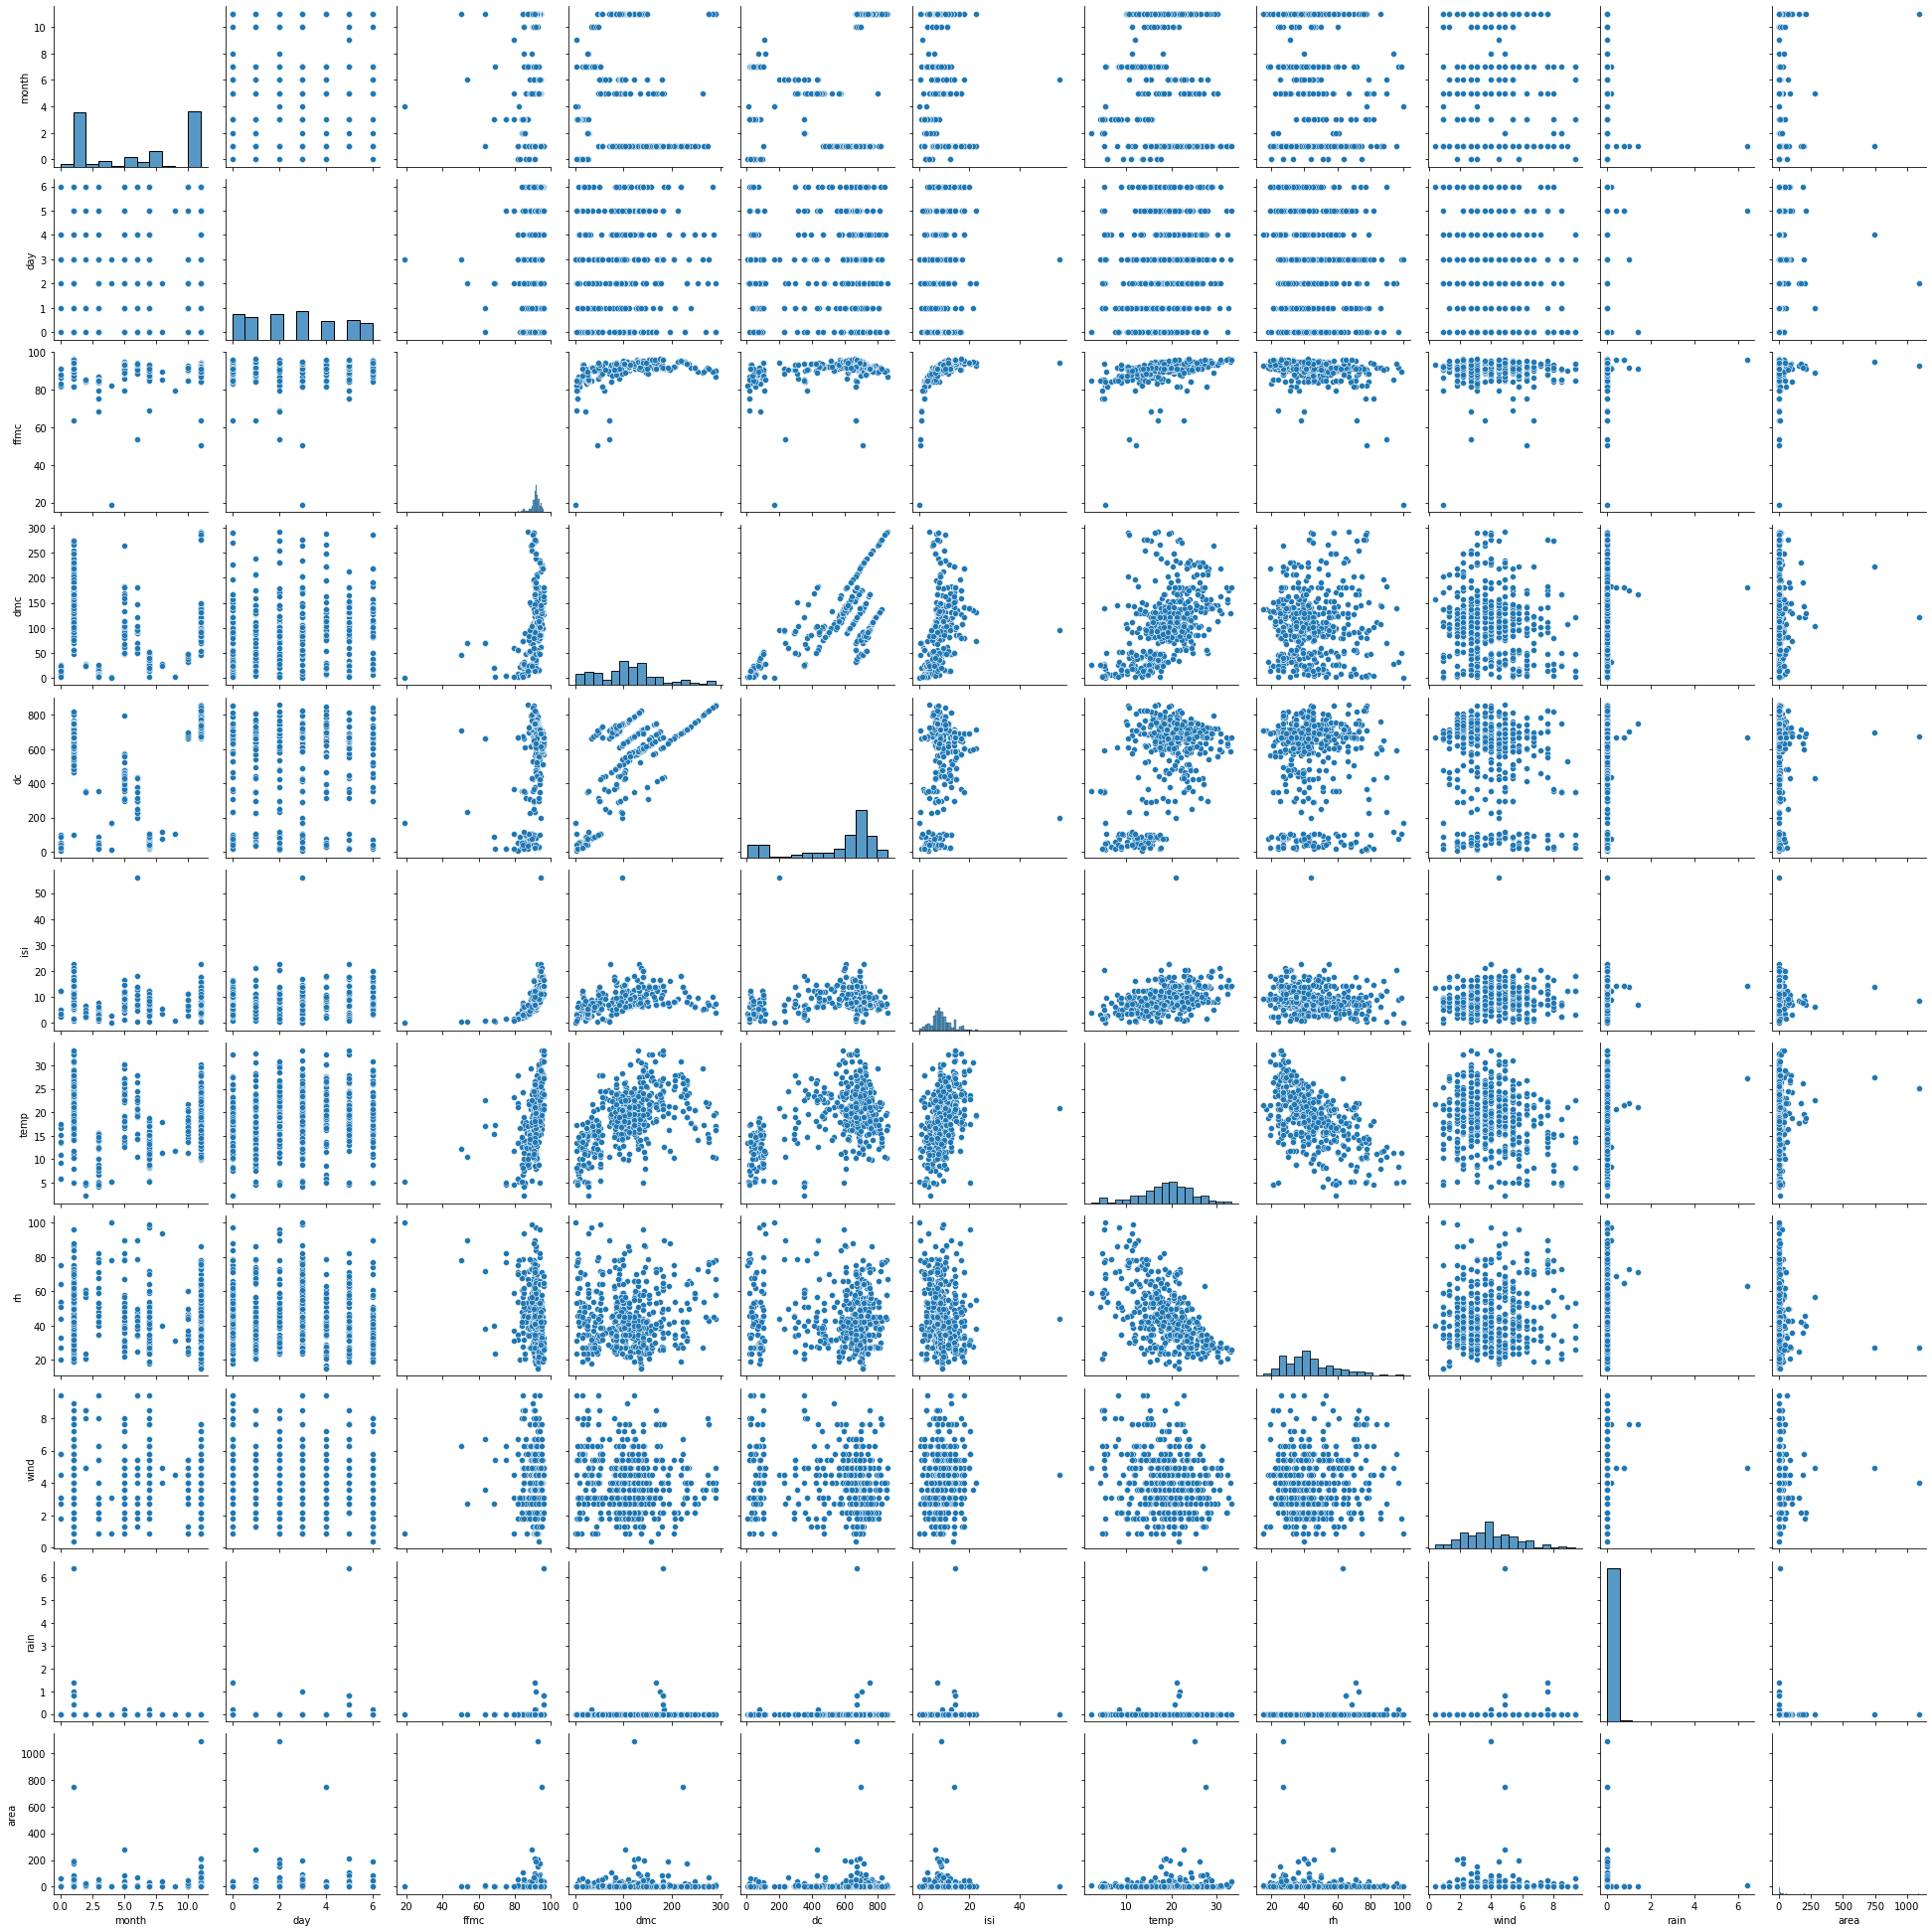

In [132]:
sns.pairplot(X)
plt.show()

## 7. Model Training | Testing | Evaluation :

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [65]:
X_train.shape, y_train.shape

((413, 11), (413, 1))

In [66]:
X_test.shape, y_test.shape

((104, 11), (104, 1))

In [67]:
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

#### I. Linear

In [68]:
svm_classifier_1 = svm.SVC(kernel= 'linear')
svm_classifier_1.fit(X_train,y_train)

y_predict_train_1 = svm_classifier_1.predict(X_train)
y_predict_test_1 = svm_classifier_1.predict(X_test)

print('TRAIN MODEL - 1')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_1),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_1)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_1),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_1))

print('TEST MODEL - 1')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_1),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_1)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_1),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_1))

TRAIN MODEL - 1
------------------------------------------------------------------------
Train Accuracy Score : 1.0
Train Precision Score : 1
Train Recall Score   : 1.0
Train Confusion Matrix :
 [[111   0]
 [  0 302]]
TEST MODEL - 1
------------------------------------------------------------------------
Test Accuracy Score  : 0.9808
Test Precision Score : 1
Test Recall Score    : 0.9737
Test Confusion Matrix :
 [[28  0]
 [ 2 74]]


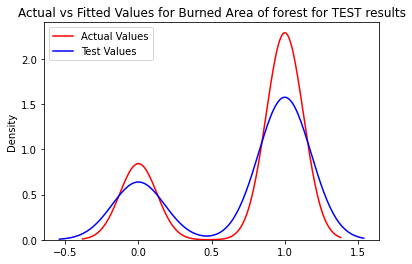

In [110]:
import seaborn as sns
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_predict_test_1, hist=False, color="b", label="Test Values",ax=ax)
plt.legend()
plt.title('Actual vs Fitted Values for Burned Area of forest for TEST results')
plt.show()

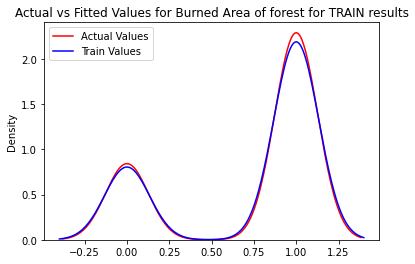

In [111]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_predict_train_1, hist=False, color="b", label="Train Values",ax=ax)
plt.legend()
plt.title('Actual vs Fitted Values for Burned Area of forest for TRAIN results')
plt.show()

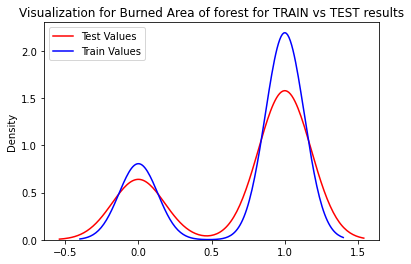

In [134]:
ax = sns.distplot(y_predict_test_1, hist=False, color="r", label='Test Values')
sns.distplot(y_predict_train_1, hist=False, color="b", label='Train Values' ,ax=ax)
plt.legend()
plt.title('Visualization for Burned Area of forest for TRAIN vs TEST results')
plt.show()

#### II. RBF

In [89]:
svm_classifier_2 = svm.SVC(kernel= 'rbf')
svm_classifier_2.fit(X_train,y_train)

y_predict_train_2 = svm_classifier_2.predict(X_train)
y_predict_test_2 = svm_classifier_2.predict(X_test)

print('TRAIN MODEL - 2')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_2),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_2)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_2),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_2))

print('TEST MODEL - 2')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_2),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_2)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_2),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_2))

TRAIN MODEL - 2
------------------------------------------------------------------------
Train Accuracy Score : 0.7579
Train Precision Score : 1
Train Recall Score   : 1.0
Train Confusion Matrix :
 [[ 11 100]
 [  0 302]]
TEST MODEL - 2
------------------------------------------------------------------------
Test Accuracy Score  : 0.7596
Test Precision Score : 1
Test Recall Score    : 1.0
Test Confusion Matrix :
 [[ 3 25]
 [ 0 76]]


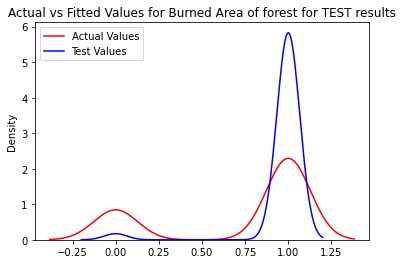

In [112]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_predict_test_2, hist=False, color="b", label="Test Values",ax=ax)
plt.legend()
plt.title('Actual vs Fitted Values for Burned Area of forest for TEST results')
plt.show()

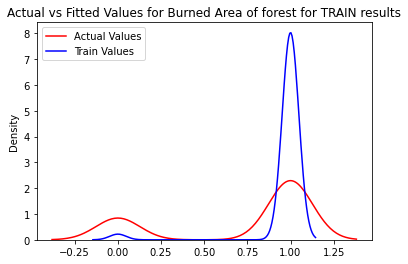

In [113]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_predict_train_2, hist=False, color="b", label="Train Values",ax=ax)
plt.legend()
plt.title('Actual vs Fitted Values for Burned Area of forest for TRAIN results')
plt.show()

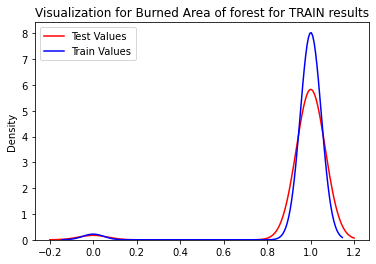

In [135]:
ax = sns.distplot(y_predict_test_2, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_2, hist=False, color="b", label="Train Values",ax=ax)
plt.legend()
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.show()

#### III. Poly

In [98]:
svm_classifier_3 = svm.SVC(kernel= 'poly')
svm_classifier_3.fit(X_train,y_train)

y_predict_train_3 = svm_classifier_3.predict(X_train)
y_predict_test_3 = svm_classifier_3.predict(X_test)

print('TRAIN MODEL - 3')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_3),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_3)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_3),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_3))

print('TEST MODEL - 3')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_3),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_3)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_3),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_3))

TRAIN MODEL - 3
------------------------------------------------------------------------
Train Accuracy Score : 0.7893
Train Precision Score : 1
Train Recall Score   : 1.0
Train Confusion Matrix :
 [[ 24  87]
 [  0 302]]
TEST MODEL - 3
------------------------------------------------------------------------
Test Accuracy Score  : 0.7981
Test Precision Score : 1
Test Recall Score    : 1.0
Test Confusion Matrix :
 [[ 7 21]
 [ 0 76]]


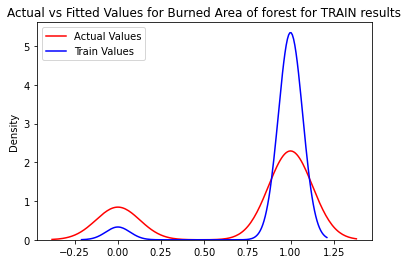

In [115]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_predict_train_3, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Actual vs Fitted Values for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

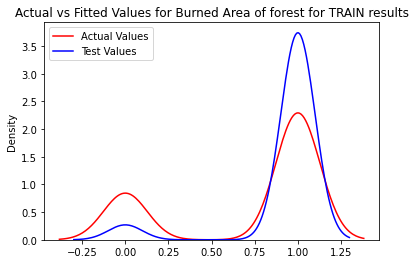

In [117]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_predict_test_3, hist=False, color="b", label="Test Values",ax=ax)
plt.title('Actual vs Fitted Values for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

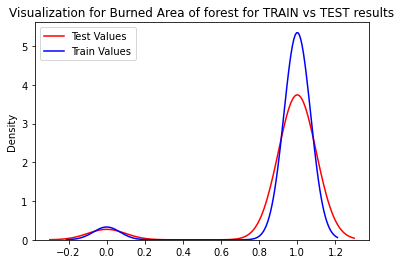

In [136]:
ax = sns.distplot(y_predict_test_3, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_3, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN vs TEST results')
plt.legend()
plt.show()

### By using params :

In [120]:
svm_classifier_4 = svm.SVC(kernel= 'linear',C=0.5,degree=6,gamma='scale')
svm_classifier_4.fit(X_train,y_train)

y_predict_train_4 = svm_classifier_4.predict(X_train)
y_predict_test_4 = svm_classifier_4.predict(X_test)

print('TRAIN MODEL - 4')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_4),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_4)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_4),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_4))

print('TEST MODEL - 4')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_4),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_4)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_4),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_4))

TRAIN MODEL - 4
------------------------------------------------------------------------
Train Accuracy Score : 0.9952
Train Precision Score : 1
Train Recall Score   : 0.9934
Train Confusion Matrix :
 [[111   0]
 [  2 300]]
TEST MODEL - 4
------------------------------------------------------------------------
Test Accuracy Score  : 0.9712
Test Precision Score : 1
Test Recall Score    : 0.9605
Test Confusion Matrix :
 [[28  0]
 [ 3 73]]


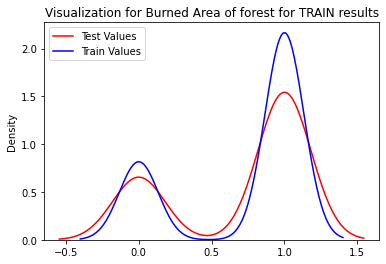

In [137]:
ax = sns.distplot(y_predict_test_4, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_4, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

In [122]:
svm_classifier_5 = svm.SVC(kernel= 'rbf',C=5.0,degree=10,gamma='scale')
svm_classifier_5.fit(X_train,y_train)

y_predict_train_5 = svm_classifier_5.predict(X_train)
y_predict_test_5 = svm_classifier_5.predict(X_test)

print('TRAIN MODEL - 5')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_5),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_5)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_5),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_5))

print('TEST MODEL - 5')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_5),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_5)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_5),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_5))

TRAIN MODEL - 5
------------------------------------------------------------------------
Train Accuracy Score : 0.8087
Train Precision Score : 1
Train Recall Score   : 1.0
Train Confusion Matrix :
 [[ 32  79]
 [  0 302]]
TEST MODEL - 5
------------------------------------------------------------------------
Test Accuracy Score  : 0.8173
Test Precision Score : 1
Test Recall Score    : 1.0
Test Confusion Matrix :
 [[ 9 19]
 [ 0 76]]


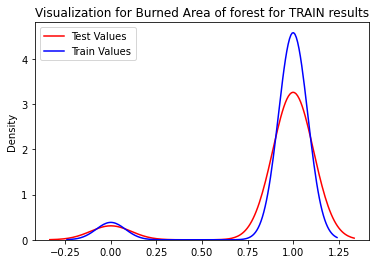

In [138]:
ax = sns.distplot(y_predict_test_5, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_5, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

In [124]:
svm_classifier_6 = svm.SVC(kernel= 'poly',C=5.0,degree=8,gamma='scale')
svm_classifier_6.fit(X_train,y_train)

y_predict_train_6 = svm_classifier_6.predict(X_train)
y_predict_test_6 = svm_classifier_6.predict(X_test)

print('TRAIN MODEL - 6')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_6),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_6)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_6),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_6))

print('TEST MODEL - 6')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_6),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_6)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_6),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_6))

TRAIN MODEL - 6
------------------------------------------------------------------------
Train Accuracy Score : 0.9007
Train Precision Score : 1
Train Recall Score   : 0.9934
Train Confusion Matrix :
 [[ 72  39]
 [  2 300]]
TEST MODEL - 6
------------------------------------------------------------------------
Test Accuracy Score  : 0.8846
Test Precision Score : 1
Test Recall Score    : 0.9342
Test Confusion Matrix :
 [[21  7]
 [ 5 71]]


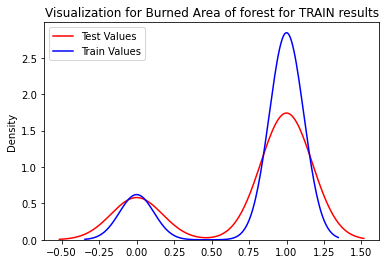

In [139]:
ax = sns.distplot(y_predict_test_6, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_6, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

In [126]:
svm_classifier_7 = svm.SVC(kernel= 'linear',C=1.0,degree=3,gamma='scale',class_weight='balanced')
svm_classifier_7.fit(X_train,y_train)

y_predict_train_7 = svm_classifier_7.predict(X_train)
y_predict_test_7 = svm_classifier_7.predict(X_test)

print('TRAIN MODEL - 7')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_7),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_7)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_7),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_7))

print('TEST MODEL - 7')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_7),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_7)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_7),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_7))

TRAIN MODEL - 7
------------------------------------------------------------------------
Train Accuracy Score : 0.9952
Train Precision Score : 1
Train Recall Score   : 0.9934
Train Confusion Matrix :
 [[111   0]
 [  2 300]]
TEST MODEL - 7
------------------------------------------------------------------------
Test Accuracy Score  : 0.9808
Test Precision Score : 1
Test Recall Score    : 0.9737
Test Confusion Matrix :
 [[28  0]
 [ 2 74]]


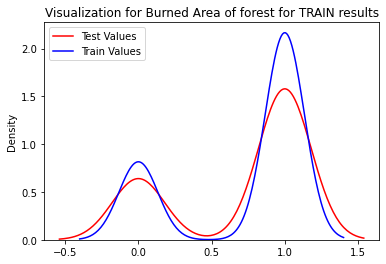

In [140]:
ax = sns.distplot(y_predict_test_7, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_7, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

In [128]:
svm_classifier_8 = svm.SVC(kernel= 'rbf',C=9.0,degree=6,gamma='scale',class_weight='balanced')
svm_classifier_8.fit(X_train,y_train)

y_predict_train_8 = svm_classifier_8.predict(X_train)
y_predict_test_8 = svm_classifier_8.predict(X_test)

print('TRAIN MODEL - 8')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_8),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_8)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_8),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_8))

print('TEST MODEL - 8')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_8),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_8)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_8),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_8))

TRAIN MODEL - 8
------------------------------------------------------------------------
Train Accuracy Score : 0.8814
Train Precision Score : 1
Train Recall Score   : 0.9901
Train Confusion Matrix :
 [[ 65  46]
 [  3 299]]
TEST MODEL - 8
------------------------------------------------------------------------
Test Accuracy Score  : 0.875
Test Precision Score : 1
Test Recall Score    : 1.0
Test Confusion Matrix :
 [[15 13]
 [ 0 76]]


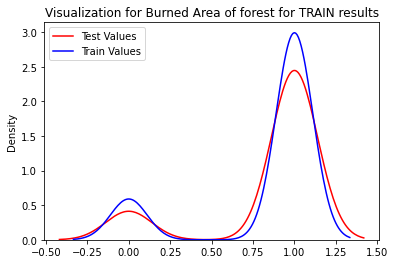

In [141]:
ax = sns.distplot(y_predict_test_8, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_8, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()

In [130]:
svm_classifier_9 = svm.SVC(kernel= 'poly',C=5.0,degree=7,gamma='scale',class_weight='balanced')
svm_classifier_9.fit(X_train,y_train)

y_predict_train_9 = svm_classifier_9.predict(X_train)
y_predict_test_9 = svm_classifier_9.predict(X_test)

print('TRAIN MODEL - 9')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_9),4))
print('Train Precision Score :',round(precision_score(y_train,y_predict_train_9)))
print('Train Recall Score   :',round(recall_score(y_train,y_predict_train_9),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train_9))

print('TEST MODEL - 9')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test,y_predict_test_9),4))
print('Test Precision Score :',round(precision_score(y_test,y_predict_test_9)))
print('Test Recall Score    :',round(recall_score(y_test,y_predict_test_9),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test_9))

TRAIN MODEL - 9
------------------------------------------------------------------------
Train Accuracy Score : 0.9031
Train Precision Score : 1
Train Recall Score   : 0.9901
Train Confusion Matrix :
 [[ 74  37]
 [  3 299]]
TEST MODEL - 9
------------------------------------------------------------------------
Test Accuracy Score  : 0.8654
Test Precision Score : 1
Test Recall Score    : 0.8947
Test Confusion Matrix :
 [[22  6]
 [ 8 68]]


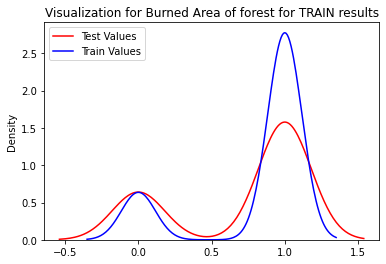

In [142]:
ax = sns.distplot(y_predict_test_9, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_9, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Burned Area of forest for TRAIN results')
plt.legend()
plt.show()